# Car Pricing Case Study
## Problem Statement
A Chinese automobile company __Geely Auto__ aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
-  Which variables are significant in predicting the price of a car
-  How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

## Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [92]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [93]:
carPricing = pd.read_csv("CarPrice_Assignment.csv")
pd.set_option('display.max_columns', 50)

In [94]:
carPricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [95]:
carPricing.shape

(205, 26)

In [96]:
carPricing.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [97]:
carPricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [98]:
carPricing["CarName"] = carPricing["CarName"].str.replace('-', ' ')
carPricing.CarName.unique()

CarName= carPricing["CarName"].str.split(" ",n = 1, expand = True)
carPricing["carCompany"] = CarName[0]
carPricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### As we can see there are some car company names that are mispelled and some are not in the correct format. We need to replace those with the correct once.

In [99]:
carPricing.drop(columns =["CarName"], inplace=True)
carPricing['carCompany'] = carPricing['carCompany'].str.upper()
companyName = set(carPricing["carCompany"])
carPricing = carPricing.replace({'MAXDA':'MAZDA','PORCSHCE' : 'PORSCHE' , 'TOYOUTA' : 'TOYOTA', 'VW' : 'VOLKSWAGEN' , 'VOKSWAGEN' : 'VOLKSWAGEN'})

## Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.
-  If there is some obvious multicollinearity going on, this is the first place to catch it
-  Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

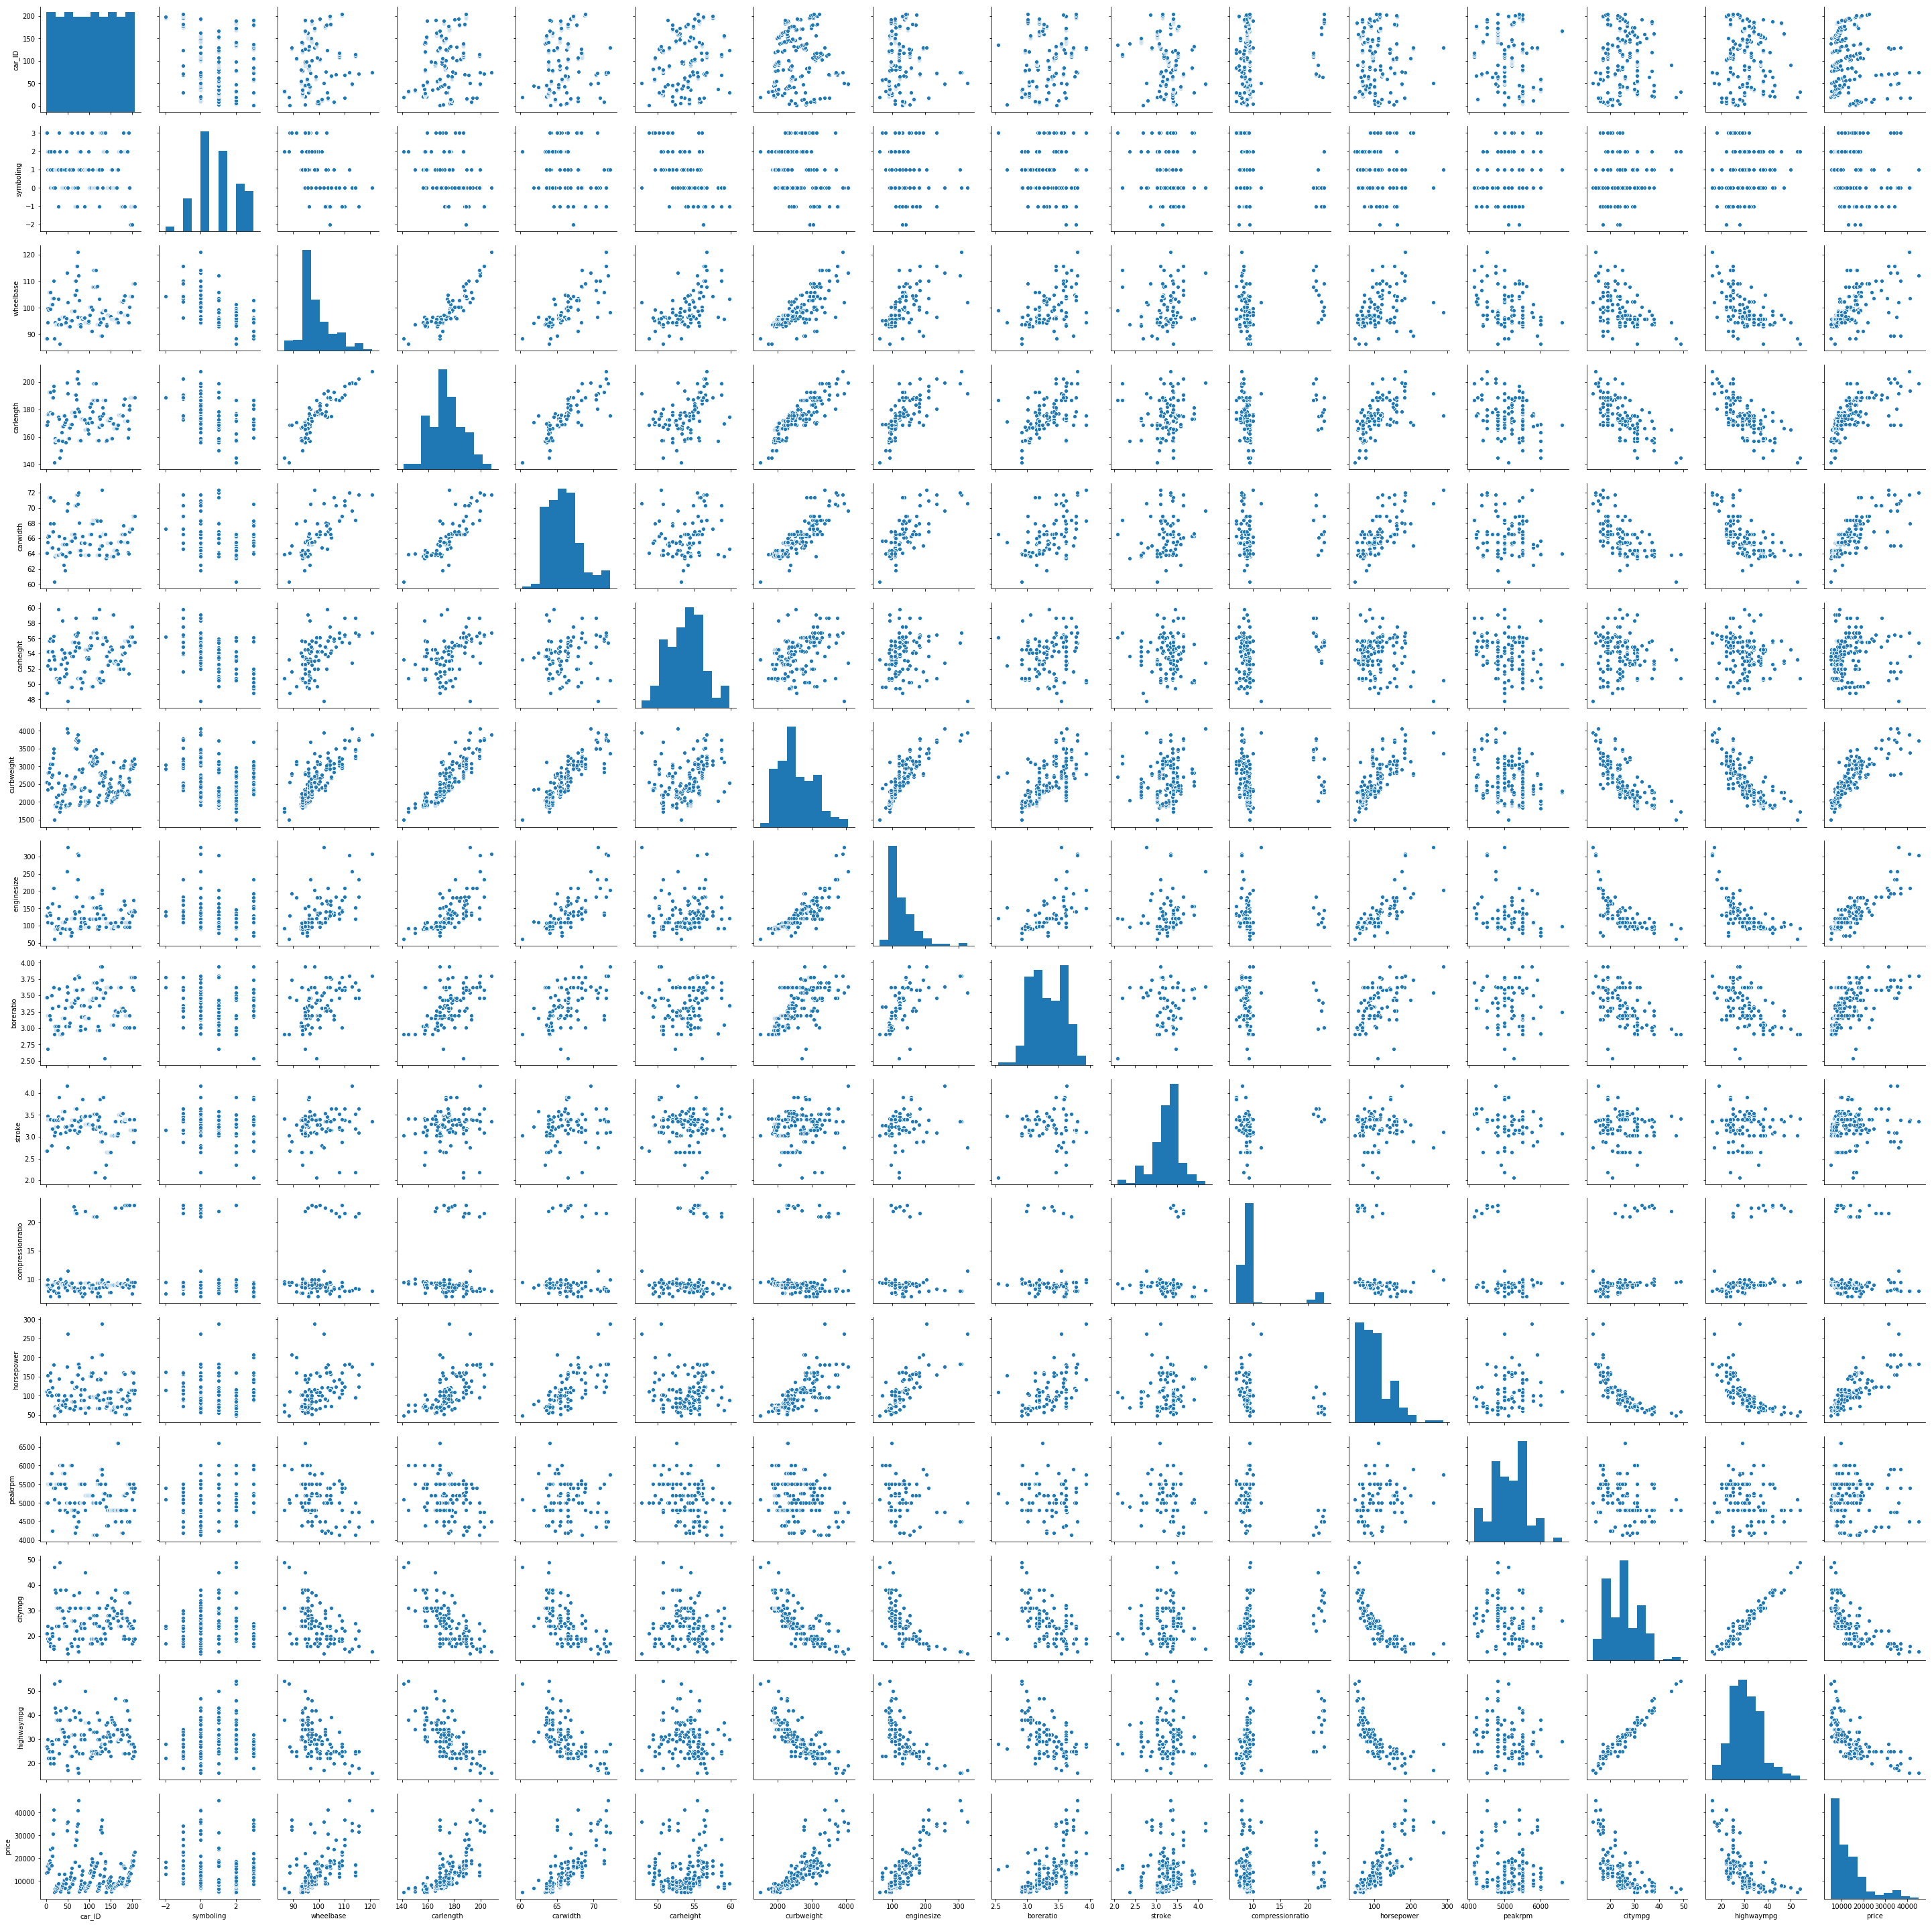

In [101]:
sns.pairplot(carPricing)
plt.show()

### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

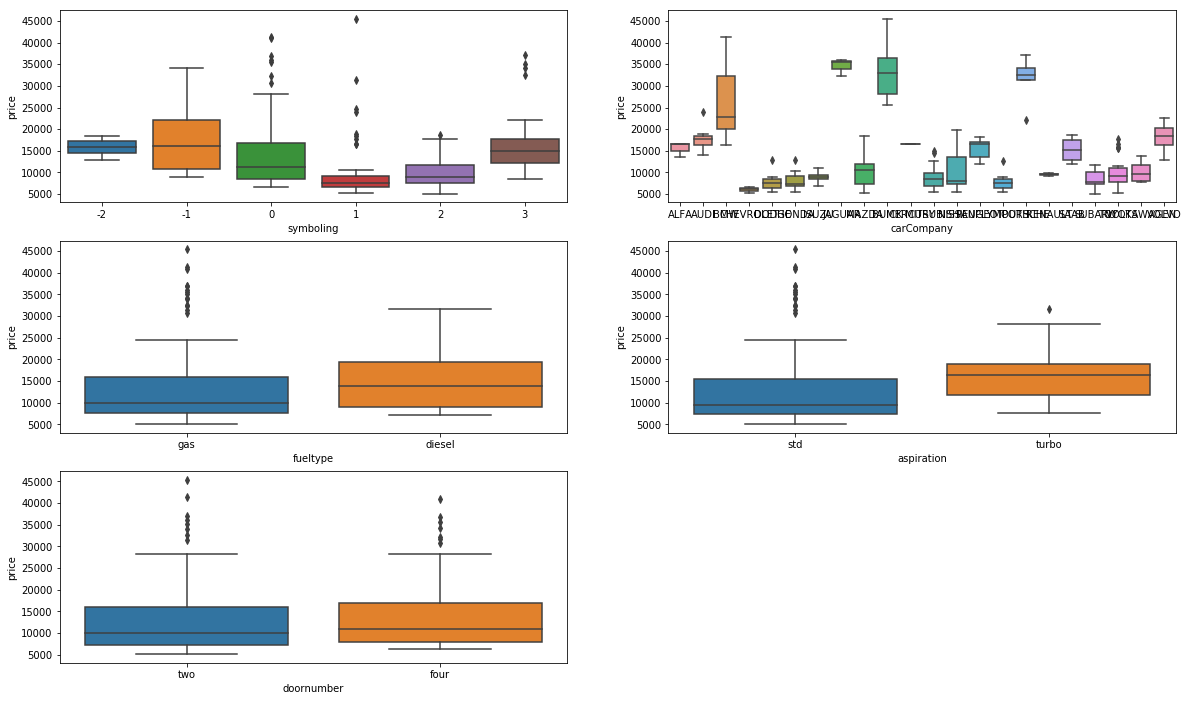

In [102]:
plt.figure(figsize=(20,12))
plt.subplot(3,2,1)
sns.boxplot(x = 'symboling', y = 'price', data = carPricing)
plt.subplot(3,2,2)
sns.boxplot(x = 'carCompany', y = 'price', data = carPricing)
plt.subplot(3,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = carPricing)
plt.subplot(3,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = carPricing)
plt.subplot(3,2,5)
sns.boxplot(x = 'doornumber', y = 'price', data = carPricing)
plt.show()

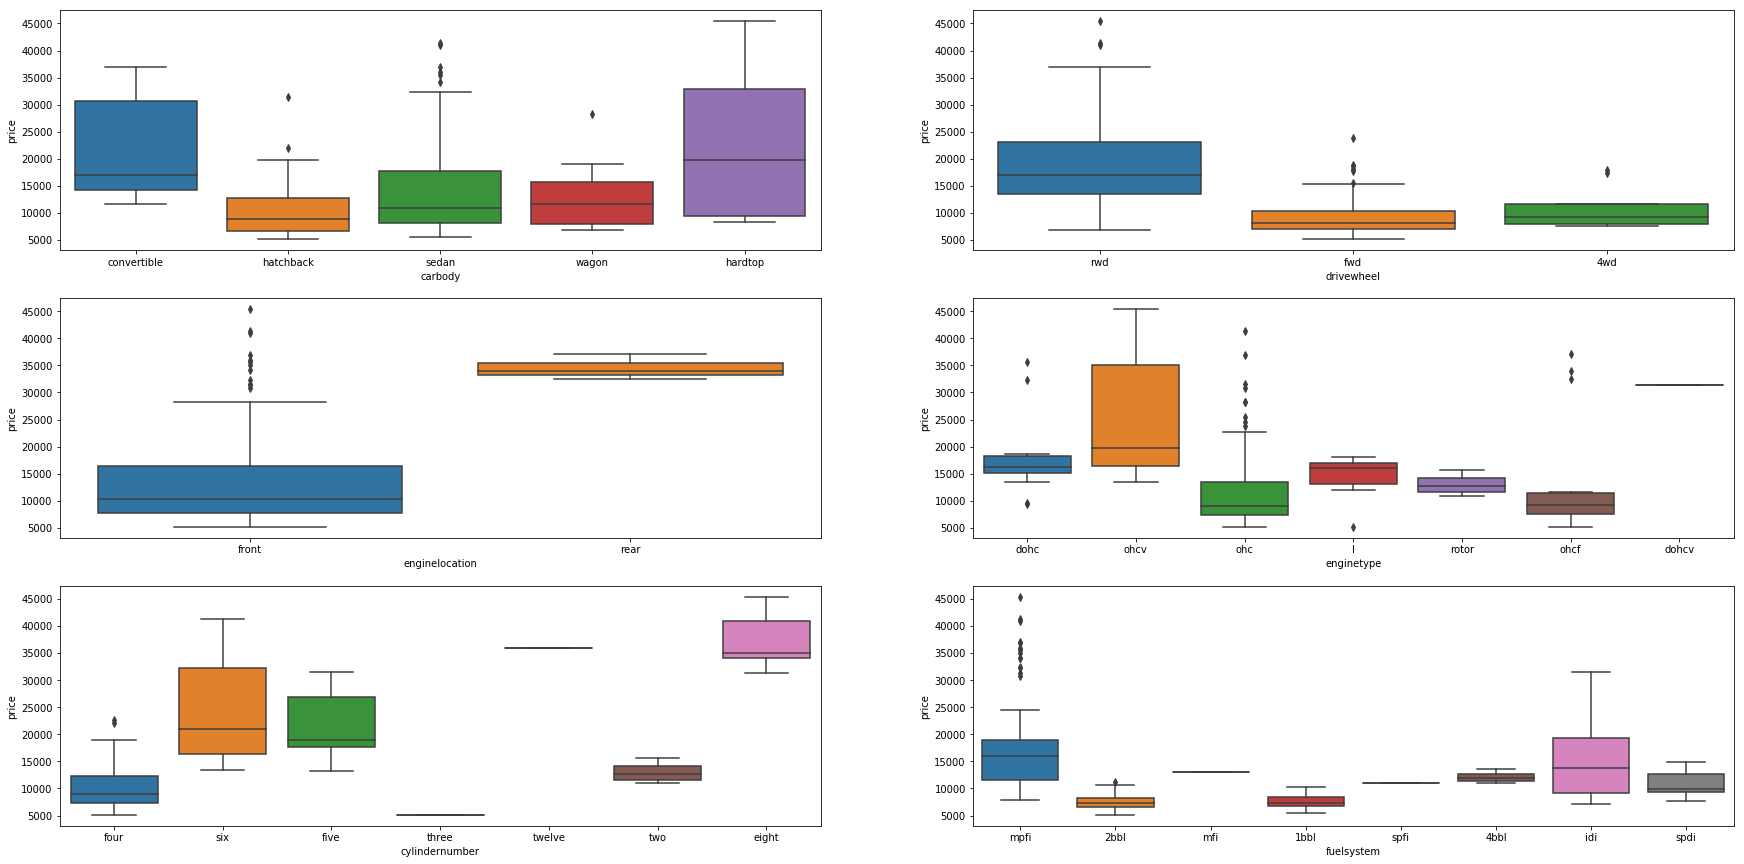

In [103]:
plt.figure(figsize=(30,15))
plt.subplot(3,2,1)
sns.boxplot(x = 'carbody', y = 'price', data = carPricing)
plt.subplot(3,2,2)
sns.boxplot(x = 'drivewheel', y = 'price', data = carPricing)
plt.subplot(3,2,3)
sns.boxplot(x = 'enginelocation', y = 'price', data = carPricing)
plt.subplot(3,2,4)
sns.boxplot(x = 'enginetype', y = 'price', data = carPricing)
plt.subplot(3,2,5)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carPricing)
plt.subplot(3,2,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carPricing)
plt.show()

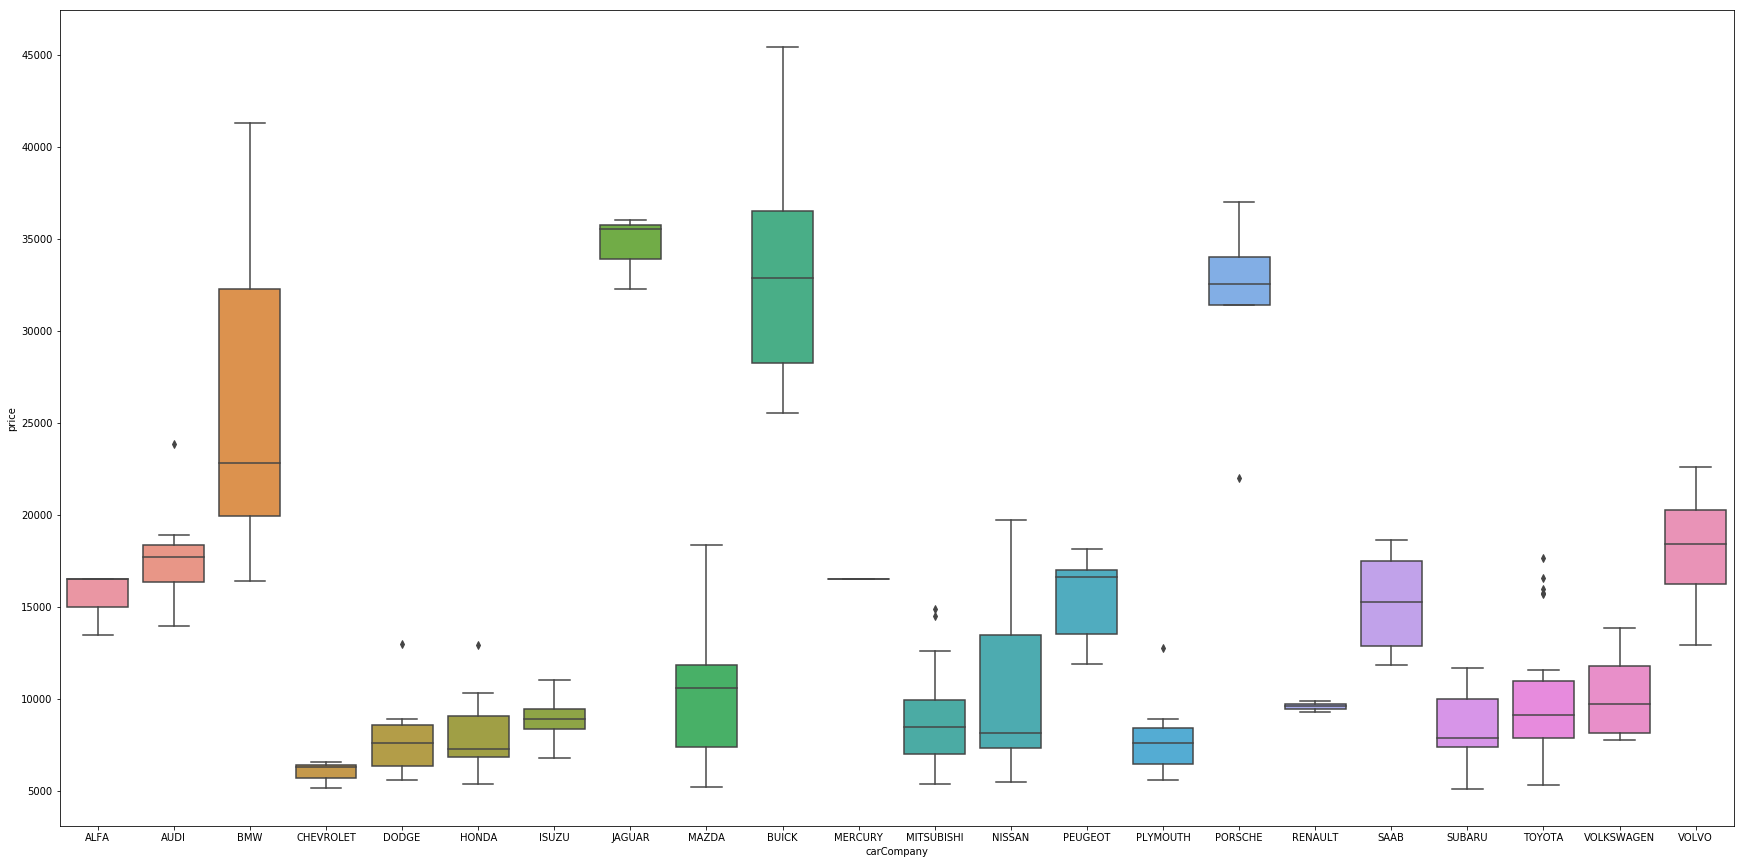

In [104]:
plt.figure(figsize=(30,15))
plt.subplot(1,1,1)
sns.boxplot(x = 'carCompany', y = 'price', data = carPricing)
plt.show()

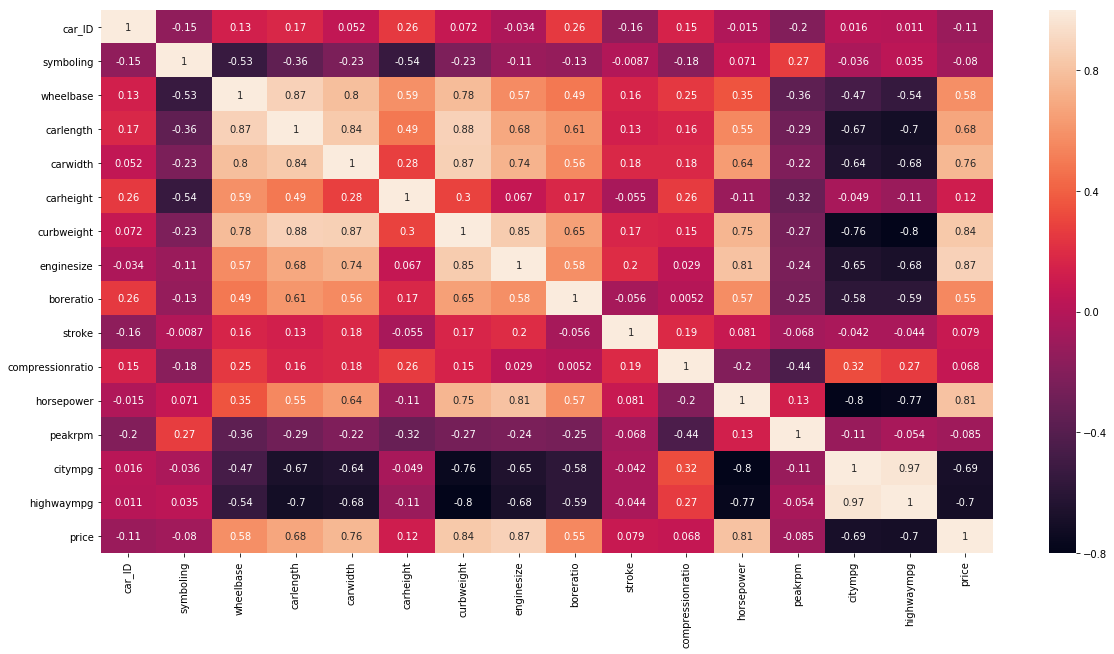

In [105]:
plt.figure(figsize = (20,10))  
sns.heatmap(carPricing.corr(),annot = True)

#### From heatmap we can see that there is a strong correation between carlength, wheelbase, carwidth, curbweight and also strong correlation between citympg and highwaympg.

In [106]:
carPricing.drop(columns = ['car_ID','wheelbase', 'carwidth', 'curbweight','highwaympg'], inplace = True)

### Data Preperation

In [107]:
carPricing['fueltype']=carPricing.fueltype.map({'gas':0,'diesel':1})
carPricing['aspiration']=carPricing.aspiration.map({'std':0,'turbo':1})
carPricing['doornumber']=carPricing.doornumber.map({'two':0,'four':1})
carPricing['enginelocation']=carPricing.enginelocation.map({'front':0,'rear':1})

### Dummy Variables

There are many variables has three or more levels. We need to convert these levels into integer as well. 
For this, we will use something called dummy variables.

In [108]:
df = pd.get_dummies(carPricing)

In [109]:
#df.drop(columns = ["carCompany_TOYOTA","carbody_sedan","drivewheel_fwd","enginetype_ohc","cylindernumber_four","fuelsystem_mpfi"], inplace = True)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [110]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that many of the columns have high integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'carlength', 'carheight','enginesize', 
            'boreratio', 'stroke','compressionratio','horsepower','peakrpm','citympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [112]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carCompany_ALFA,carCompany_AUDI,carCompany_BMW,carCompany_BUICK,carCompany_CHEVROLET,carCompany_DODGE,carCompany_HONDA,carCompany_ISUZU,carCompany_JAGUAR,carCompany_MAZDA,carCompany_MERCURY,carCompany_MITSUBISHI,carCompany_NISSAN,carCompany_PEUGEOT,carCompany_PLYMOUTH,carCompany_PORSCHE,carCompany_RENAULT,carCompany_SAAB,carCompany_SUBARU,carCompany_TOYOTA,carCompany_VOLKSWAGEN,carCompany_VOLVO
122,0.6,0,0,1,0,0.426016,0.265487,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.068818,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1.0,0,0,0,0,0.452033,0.212389,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.466890,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.6,0,0,0,0,0.448780,0.424779,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.122110,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0,0,0.450407,0.088496,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.314446,1,0,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,0,1,1,0,0.775610,0.858407,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.382131,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Dividing into X and Y sets for the model building

In [113]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

Here, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [114]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [115]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
colDropped = X_train.columns[~rfe.support_]
X_train1 = X_train[col]

In [116]:
col

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'carCompany_AUDI', 'carCompany_BMW', 'carCompany_BUICK',
       'carCompany_PORSCHE'],
      dtype='object')

In [117]:
colDropped

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'carCompany_ALFA', 'carCompany_CHEVROLET', 'carCompany_DODGE',
       'carCompany_HONDA', 'carCompany_ISUZU', 'carCompany_JAGUAR',
       'carCompany_MAZDA', 'carCompany_MERCURY', 'carCompany_MITSUBISHI',
       'carCompany_NISSAN', 'carCompany_PEUGEOT', 'carCompany_PLYMOUTH',
       'carCompany_RENAULT', 'carCompany_SAAB', 'carCompany_SUBARU',
      

In [118]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train1 = sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train1).fit()   # Running the linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.94e-61
Time:                        18:19:28   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

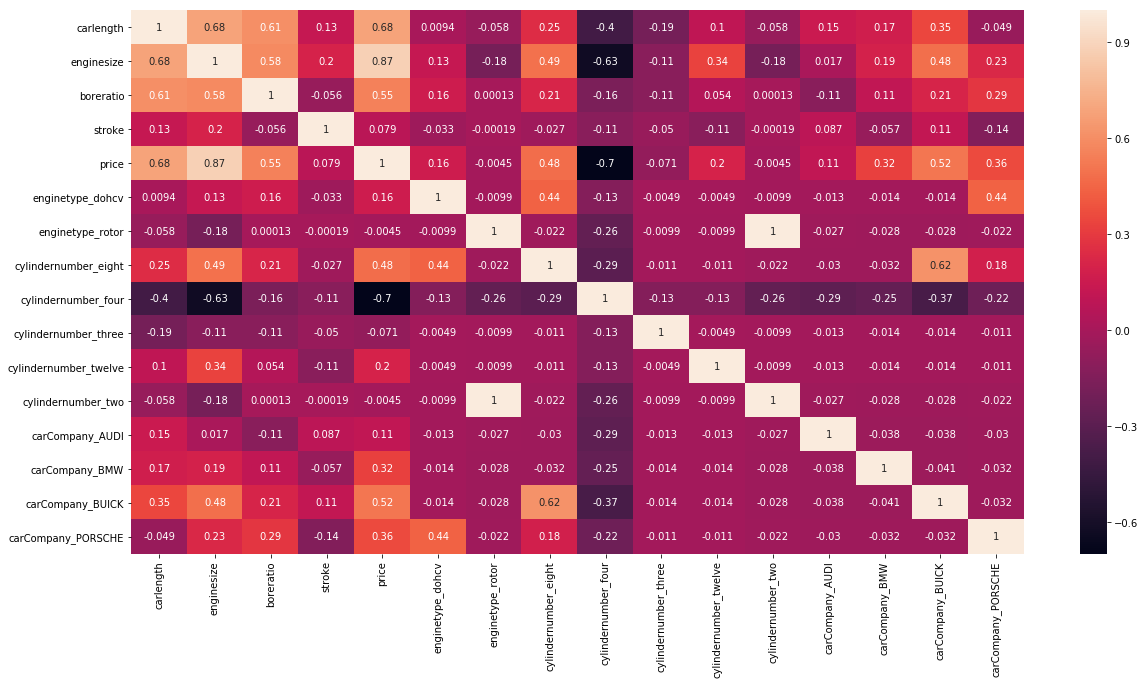

In [119]:
df.drop(colDropped,axis=1,inplace=True)
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [120]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
0,const,57.560000
2,enginesize,30.460000
8,cylindernumber_four,14.630000
3,boreratio,7.970000
7,cylindernumber_eight,4.810000
10,cylindernumber_twelve,4.070000
1,carlength,3.390000
5,enginetype_dohcv,3.350000


#### Dropping enginetype_rotor beacuse of its high VIF value and it is highly correlated with cylindernumber_two.

In [121]:
X_train2 = X_train1.drop(["enginetype_rotor"], axis = 1)

In [122]:
lm2 = sm.OLS(y_train,X_train2).fit()   # Running the linear model

In [123]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.94e-61
Time:                        18:19:30   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

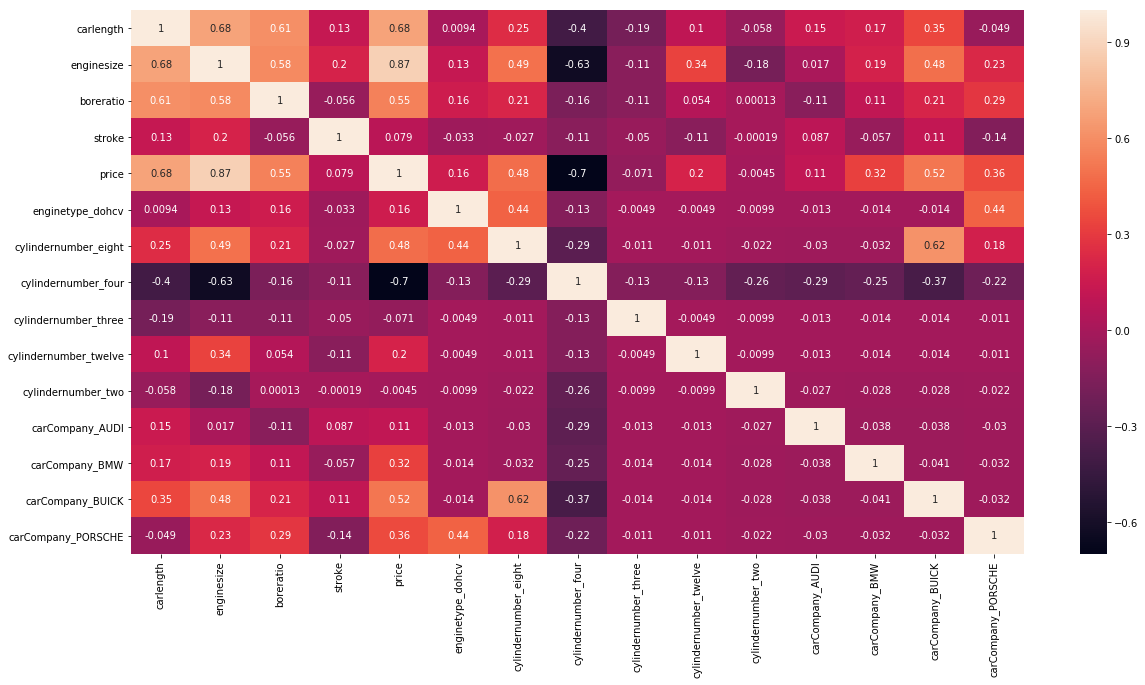

In [124]:
df.drop(['enginetype_rotor'],axis=1,inplace=True)
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [125]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.56
2,enginesize,30.46
7,cylindernumber_four,14.63
3,boreratio,7.97
10,cylindernumber_two,6.32
6,cylindernumber_eight,4.81
9,cylindernumber_twelve,4.07
1,carlength,3.39
5,enginetype_dohcv,3.35
4,stroke,3.32


In [126]:
#### Droppinh cylindernumber_four as it has high VIF value.

In [127]:
X_train3= X_train2.drop('cylindernumber_four', 1)

In [128]:
lm3 = sm.OLS(y_train,X_train3).fit()   # Running the linear model

In [129]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     94.33
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.10e-59
Time:                        18:19:32   Log-Likelihood:                 185.11
No. Observations:                 143   AIC:                            -342.2
Df Residuals:                     129   BIC:                            -300.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

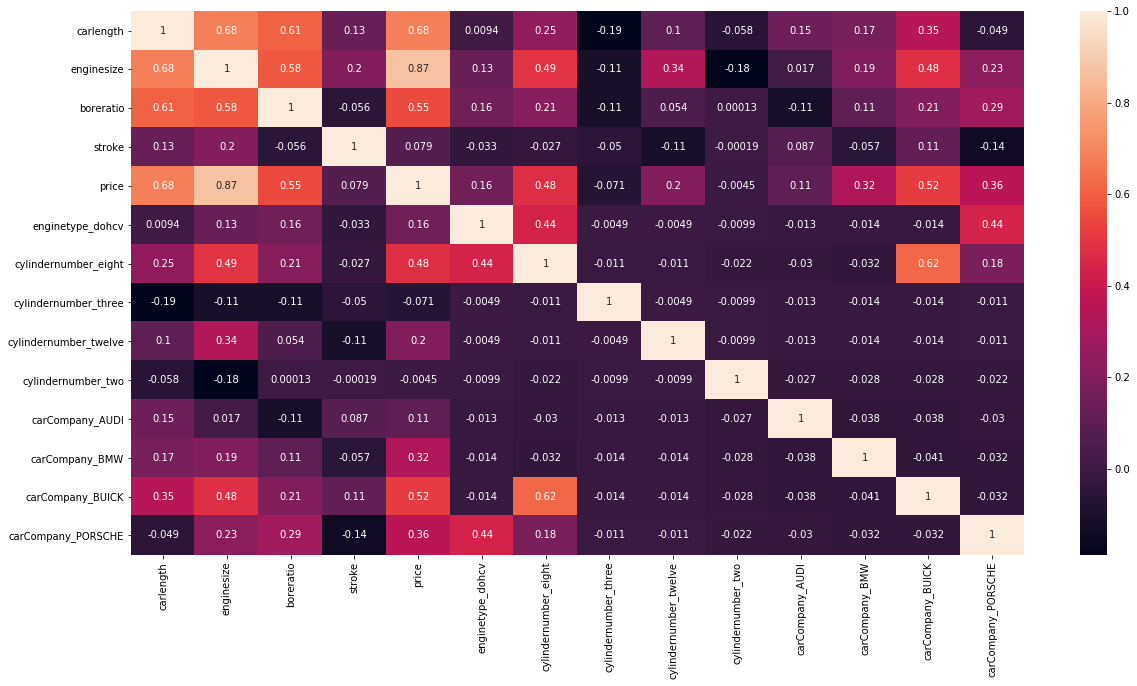

In [130]:
df.drop(['cylindernumber_four'],axis=1,inplace=True)
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [131]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.13
2,enginesize,5.52
1,carlength,3.37
6,cylindernumber_eight,2.97
3,boreratio,2.77
5,enginetype_dohcv,2.46
8,cylindernumber_twelve,1.91
13,carCompany_PORSCHE,1.88
12,carCompany_BUICK,1.85
4,stroke,1.71


#### Dropping enginetype_dohcv as it has high P value

In [132]:
#Dropping insignifant variable
X_train4 = X_train3.drop('enginetype_dohcv', 1)

In [133]:
lm4 = sm.OLS(y_train,X_train4).fit()   # Running the linear model

In [134]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.99e-60
Time:                        18:19:34   Log-Likelihood:                 185.11
No. Observations:                 143   AIC:                            -344.2
Df Residuals:                     130   BIC:                            -305.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

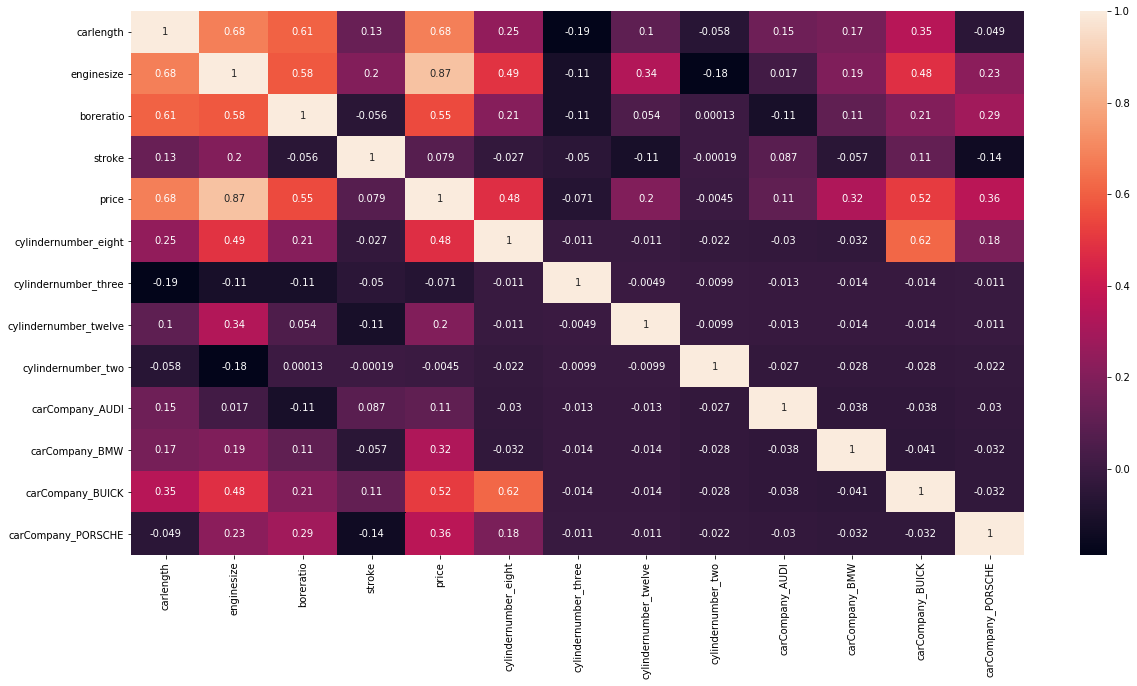

In [135]:
df.drop(['enginetype_dohcv'],axis=1,inplace=True)
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [136]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.95
2,enginesize,5.30
1,carlength,3.36
3,boreratio,2.73
7,cylindernumber_twelve,1.87
5,cylindernumber_eight,1.81
4,stroke,1.63
11,carCompany_BUICK,1.61
12,carCompany_PORSCHE,1.52
10,carCompany_BMW,1.21


#### Dropping cylindernumber_eight as it has significant high P value

In [137]:
#Dropping insignifant variable
X_train5 = X_train4.drop('cylindernumber_eight', 1)

In [138]:
lm5 = sm.OLS(y_train,X_train5).fit()   # Running the linear model

In [139]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.44e-61
Time:                        18:19:35   Log-Likelihood:                 184.86
No. Observations:                 143   AIC:                            -345.7
Df Residuals:                     131   BIC:                            -310.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

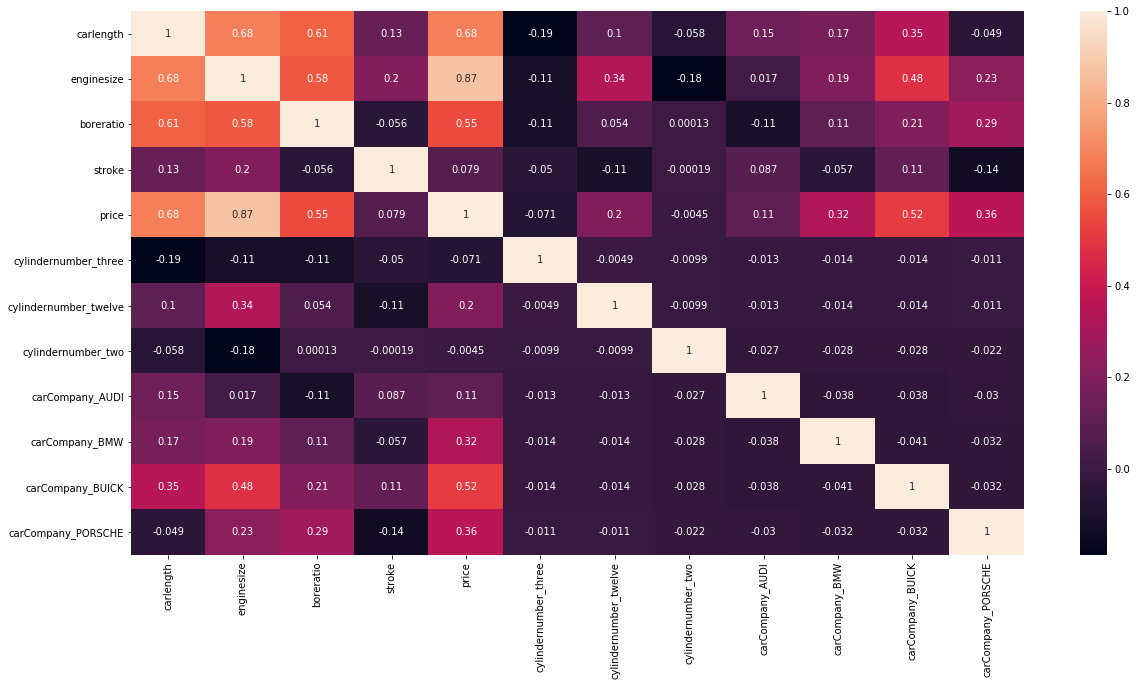

In [140]:
df.drop(['cylindernumber_eight'],axis=1,inplace=True)
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [141]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.46
2,enginesize,4.70
1,carlength,3.32
3,boreratio,2.65
6,cylindernumber_twelve,1.77
4,stroke,1.51
11,carCompany_PORSCHE,1.41
10,carCompany_BUICK,1.33
9,carCompany_BMW,1.19
7,cylindernumber_two,1.16


In [142]:
#Dropping insignifant variable
X_train6 = X_train5.drop('cylindernumber_twelve', 1)

In [143]:
lm6 = sm.OLS(y_train,X_train6).fit()   # Running the linear model

In [144]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.52e-62
Time:                        18:19:36   Log-Likelihood:                 183.72
No. Observations:                 143   AIC:                            -345.4
Df Residuals:                     132   BIC:                            -312.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0935 

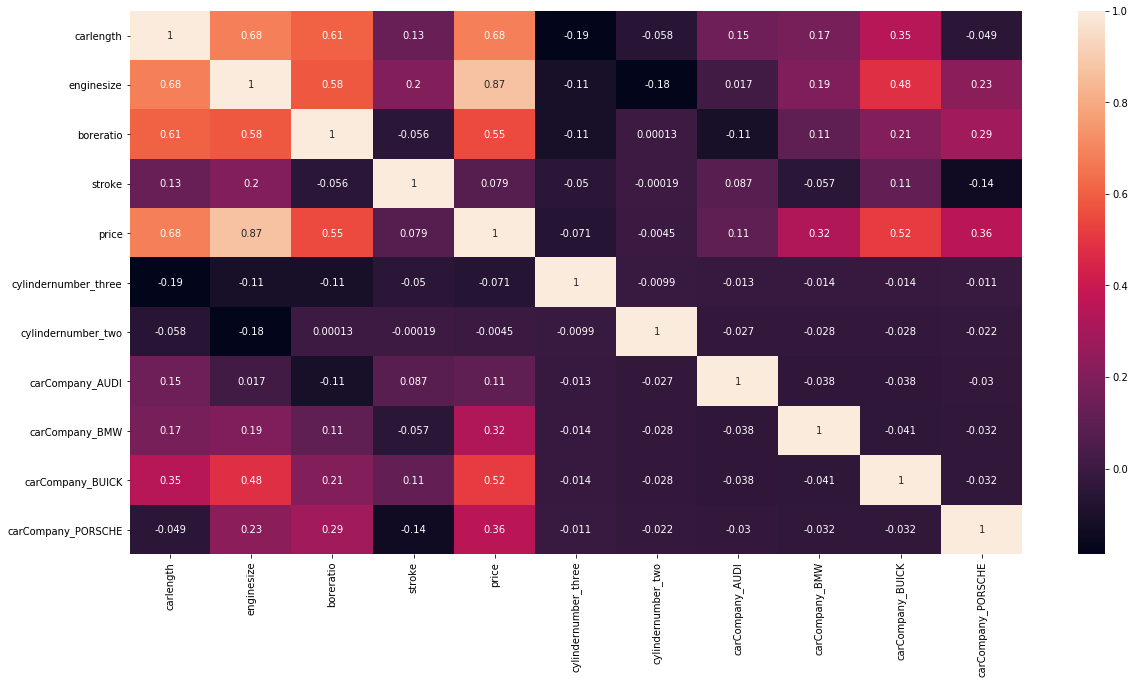

In [145]:
df.drop(['cylindernumber_twelve'],axis=1,inplace=True)
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [146]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,24.37
1,carlength,3.22
2,enginesize,2.81
3,boreratio,2.51
10,carCompany_PORSCHE,1.35
4,stroke,1.27
9,carCompany_BUICK,1.22
7,carCompany_AUDI,1.13
8,carCompany_BMW,1.11
6,cylindernumber_two,1.10


In [147]:
#Dropping insignifant variable
X_train7 = X_train6.drop('boreratio', 1)

In [148]:
lm7 = sm.OLS(y_train,X_train7).fit()   # Running the linear model

In [149]:
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.36e-62
Time:                        18:19:38   Log-Likelihood:                 182.03
No. Observations:                 143   AIC:                            -344.1
Df Residuals:                     133   BIC:                            -314.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1171 

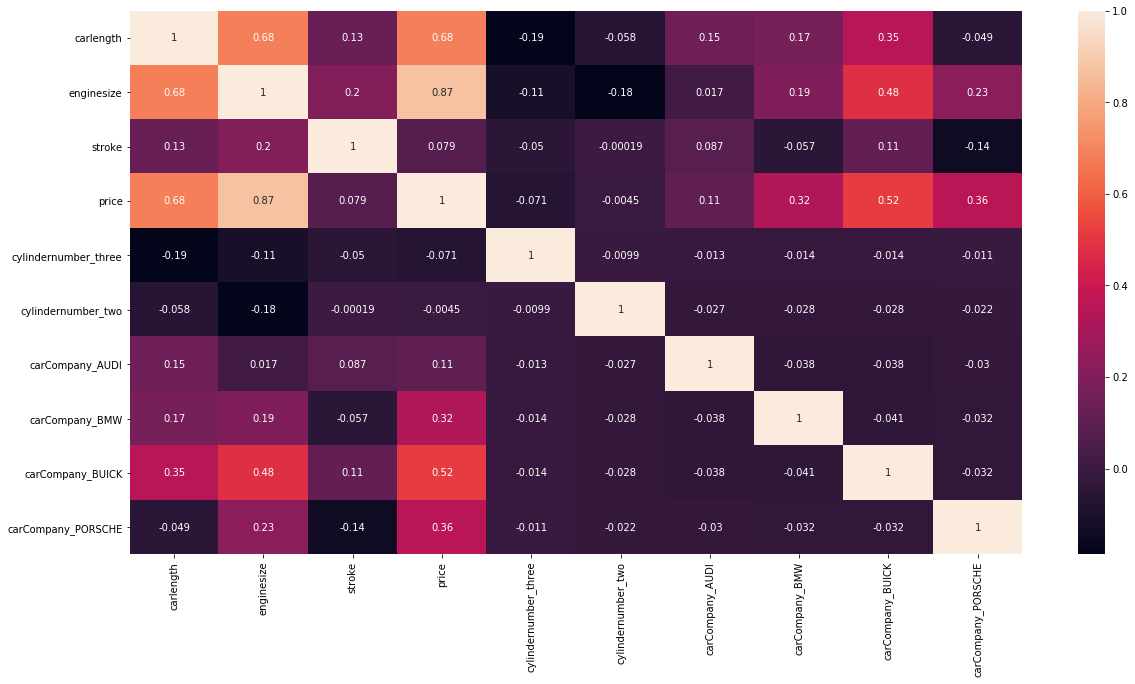

In [150]:
df.drop(['boreratio'],axis=1,inplace=True)
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [151]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.18
2,enginesize,2.72
1,carlength,2.30
8,carCompany_BUICK,1.21
9,carCompany_PORSCHE,1.17
3,stroke,1.11
7,carCompany_BMW,1.11
5,cylindernumber_two,1.08
4,cylindernumber_three,1.06
6,carCompany_AUDI,1.05


In [152]:
#Dropping insignifant variable
X_train8 = X_train7.drop('stroke', 1)

In [153]:
lm8 = sm.OLS(y_train,X_train8).fit()   # Running the linear model

In [154]:
#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.47e-63
Time:                        18:19:39   Log-Likelihood:                 181.74
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     134   BIC:                            -318.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1310 

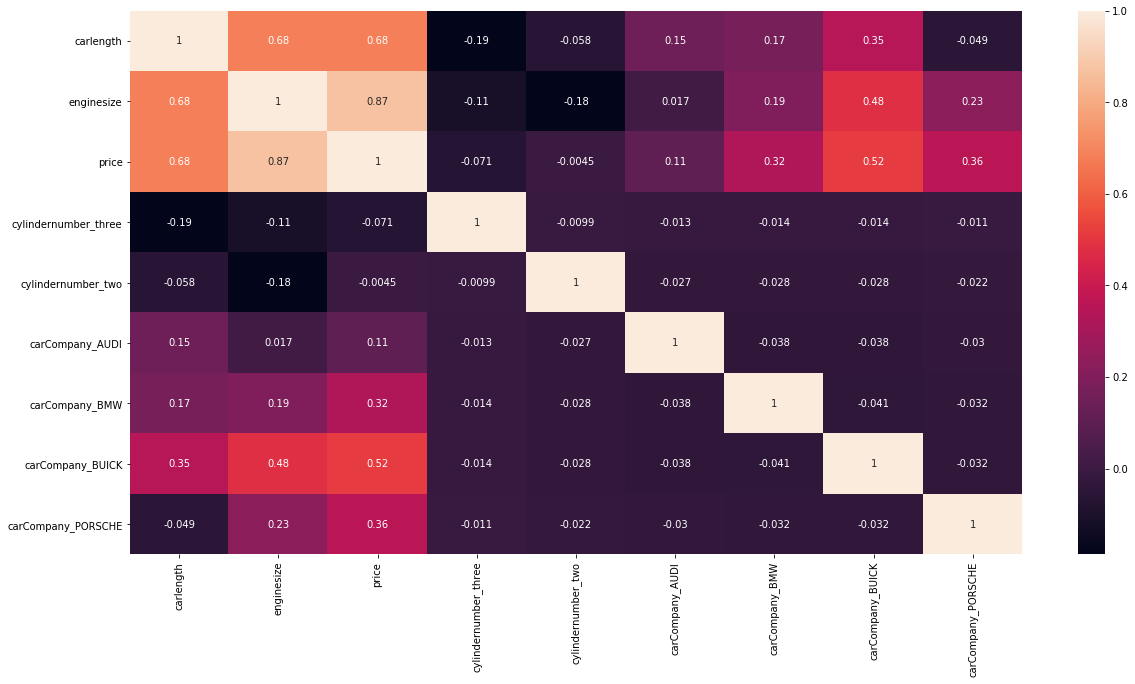

In [155]:
df.drop(['stroke'],axis=1,inplace=True)
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [156]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.91
2,enginesize,2.60
1,carlength,2.30
7,carCompany_BUICK,1.21
8,carCompany_PORSCHE,1.14
6,carCompany_BMW,1.09
4,cylindernumber_two,1.08
3,cylindernumber_three,1.05
5,carCompany_AUDI,1.05


In [157]:
X_train9 = X_train8.drop('cylindernumber_three', 1)

In [158]:
lm9 = sm.OLS(y_train,X_train9).fit() 

In [159]:
#Let's see the summary of our linear model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.32e-63
Time:                        18:19:40   Log-Likelihood:                 179.98
No. Observations:                 143   AIC:                            -344.0
Df Residuals:                     135   BIC:                            -320.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1233      0

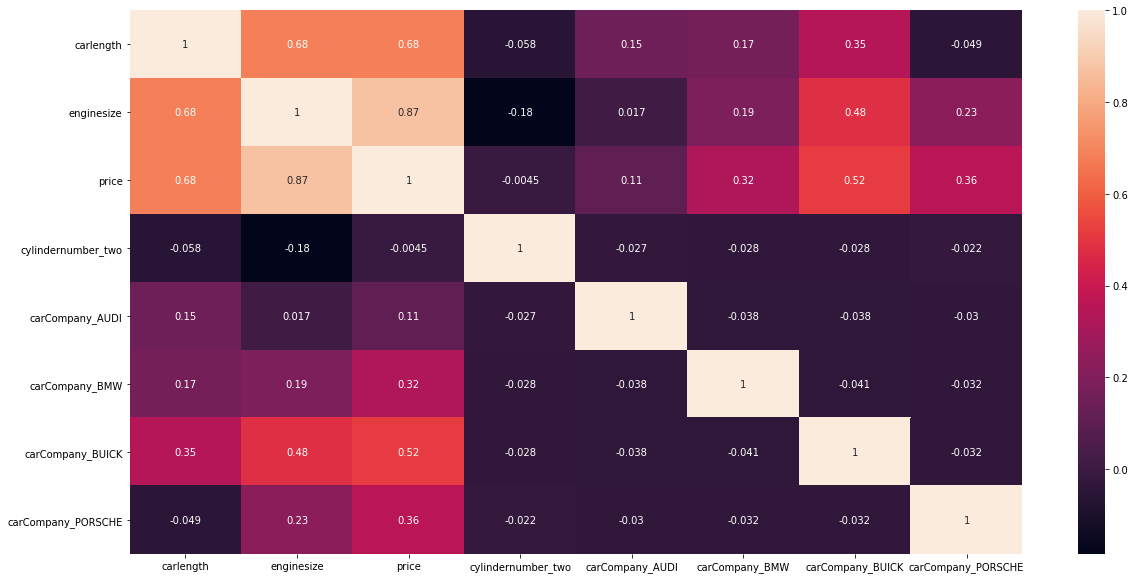

In [160]:
df.drop(['cylindernumber_three'],axis=1,inplace=True)
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

In [161]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.38
2,enginesize,2.60
1,carlength,2.23
6,carCompany_BUICK,1.21
7,carCompany_PORSCHE,1.14
5,carCompany_BMW,1.09
3,cylindernumber_two,1.08
4,carCompany_AUDI,1.05


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [162]:
y_train_price = lm9.predict(X_train9)

Text(0.5, 0, 'Errors')

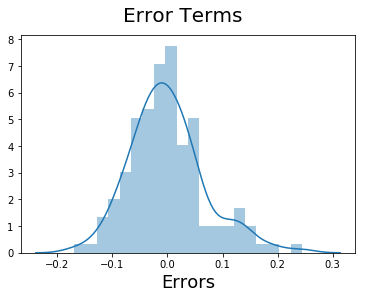

In [163]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [164]:
num_vars = ['symboling', 'carlength', 'carheight','enginesize', 
            'boreratio', 'stroke','compressionratio','horsepower','peakrpm','citympg','price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [165]:
y_test = df_test.pop('price')
X_test = df_test
X_test9 = sm.add_constant(X_test)

In [166]:
X_test9 = X_test9.drop(colDropped, axis=1)
X_test9 = X_test9.drop(['enginetype_rotor','cylindernumber_four','enginetype_dohcv',
                            'cylindernumber_eight','cylindernumber_twelve','boreratio','stroke','cylindernumber_three'], axis=1)
X_test9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 8 columns):
const                 62 non-null float64
carlength             62 non-null float64
enginesize            62 non-null float64
cylindernumber_two    62 non-null uint8
carCompany_AUDI       62 non-null uint8
carCompany_BMW        62 non-null uint8
carCompany_BUICK      62 non-null uint8
carCompany_PORSCHE    62 non-null uint8
dtypes: float64(3), uint8(5)
memory usage: 2.2 KB


In [167]:
y_test_price = lm9.predict(X_test9)
y_test_price

160    0.014469
186    0.072097
59     0.139332
165    0.021883
140    0.023887
64     0.139332
198    0.203093
75     0.208186
172    0.223723
104    0.337011
200    0.244038
136    0.162796
111    0.159383
41     0.087250
73     1.136554
31    -0.074905
156    0.014469
133    0.162796
65     0.197682
83     0.251678
195    0.244038
197    0.244038
126    0.679762
118   -0.043114
167    0.223723
101    0.370994
124    0.251678
69     0.607628
11     0.318886
46     0.112100
         ...   
110    0.316186
201    0.244038
115    0.159383
174    0.087868
134    0.162796
169    0.223723
92     0.007657
173    0.132535
74     1.094169
3      0.208199
157    0.014469
81     0.124502
32    -0.106612
99     0.118294
26    -0.043114
88     0.077982
184    0.027429
187    0.027429
52    -0.033831
168    0.223723
164    0.021883
188    0.072097
7      0.358440
158    0.059136
123    0.129446
28     0.129446
29     0.251678
182    0.027429
40     0.087250
128    0.679762
Length: 62, dtype: float

In [168]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_price)

#### In the below graph y_test_price is reffered as y_pred for better understanding.

Text(0, 0.5, 'y_pred')

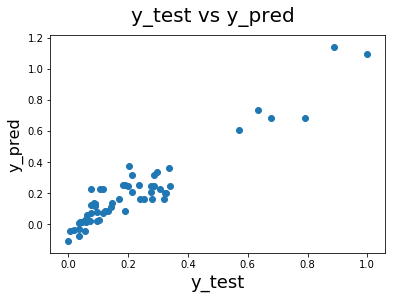

In [169]:
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

We can see that the equation of our best fitted line is:

$ price = 0.852  \times  enginesize + 0.196  \times  carlength + 0.216 \times cylindernumber\_two  + 0.121 \times carCompany\_AUDI + 0.235 \times carCompany\_BMW + 0.211 \times carCompany\_BUICK + 0.2999 \times carCompany\_PORSCHE $

In [170]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_test_price)
r_squared = r2_score(y_test,y_test_price)

In [171]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.006383377598164628
r_square_value : 0.8541475564965516


In [172]:
y_test_price.count()

62

In [173]:
y_test.count()

62

Text(0, 0.5, 'Car Pricing')

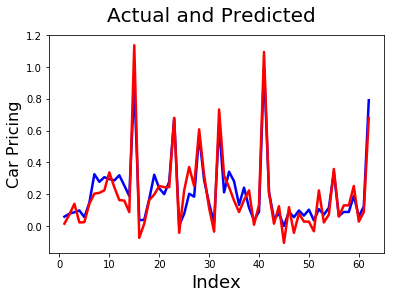

In [174]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_price, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Pricing', fontsize=16)

Text(0, 0.5, 'Error(y_test - y_test_price)')

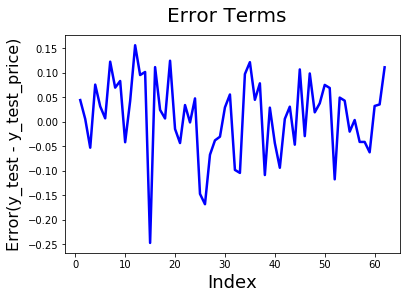

In [175]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test - y_test_price, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Error(y_test - y_test_price)', fontsize=16)

## Conclusion:

#### Overall we have a decent model. Below are some of the observations :- 

1. Then R2 and Adjested R2 vaules are 0.892 (89.2%), 0.898 (89.8%)respectively. Both the values are quite good, it means that there is a good relationship between your model and the response variables.

2. The Mean_Squared_Error : 0.00638 (it is the average square of errors and the value here is quite low, which indicates that the overall model is close to the perfect model) and r_square_value : 0.854 (85.4%) (which means there is good correlation) for predicted set.

3. Price of the car is basically dependent on the below vaiables : -
    - enginesize : As we can see from heatmap, enginesize has very good correlation with price, so we can say that based on the size of the engine price of the car can vary.
    - carlength : As we can see from heatmap, car length has good correlation with price, so we can say that based on the length of the car, price of the car can vary.
    - carCompany: Based on company of the car, price varies. It might be the brand value. Below are some such car companies:
        - BUICK
        - PORSCHE
        - BMW
        - AUDI
    - cylindernumber : Also with the number of the cylinders, price of the car may vary.